In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from sascorer import calculateScore

In [8]:
## file io
training_dataset_path = '~/Github/rl_graph_generation/gym-molecule/gym_molecule/dataset/250k_rndm_zinc_drugs_clean.smi'  # single smiles column
generated_dataset_path = '~/Github/rl_graph_generation/molecule_gen/bad_logp_generated.smi'  # single smiles column

training_df = pd.read_csv(training_dataset_path, header=None, names=['smiles'])
training_s = training_df['smiles']
generated_df = pd.read_csv(generated_dataset_path, header=None, names=['smiles'])
generated_s = generated_df['smiles']

In [3]:
# # TEST datasets, for DEBUG only
# training_s = training_df['smiles'][100000:200000]
# generated_s = training_df['smiles'][10000:20000].append(training_df['smiles'][0:5]).append(training_df['smiles'][10:15])

In [9]:
# take a sample from the training dataset and the generated dataset
n = 5000
assert n <= len(training_s)
assert n <= len(generated_s)
training_s = training_s.sample(n)
generated_s = generated_s.sample(n)

In [10]:
## statistics

# % unique within generated
print('% unique within generated: {}'.format(len(generated_s.unique()) / len(generated_s)))

# % unique within training (as a check)
print('% unique within training: {}'.format(len(training_s.unique()) / len(training_s)))

# % unique compared to training
gen_set = set(generated_s)
training_set = set(training_s)
num_intersect = len(gen_set.intersection(training_set))
print('% unique compared to training: {}'.format((len(gen_set) - num_intersect) / len(gen_set)))

# internal diversity
# TODO(Bowen): figure out a reasonable way to calculate. Look at https://github.com/gablg1/ORGAN and https://github.com/mostafachatillon/ChemGAN-challenge

## training dataset
# MW
mw_train_list = [Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in training_s]
print('train MW mean: {}'.format(np.array(mw_train_list).mean()))
print('train MW std: {}'.format(np.array(mw_train_list).std()))
# logP
logp_train_list = [Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in training_s]
print('train logP max: {}'.format(np.array(logp_train_list).max()))
print('train logP mean: {}'.format(np.array(logp_train_list).mean()))
print('train logP std: {}'.format(np.array(logp_train_list).std()))
# SA
sa_train_list = [calculateScore(Chem.MolFromSmiles(s)) for s in training_s]
print('train SA mean: {}'.format(np.array(sa_train_list).mean()))
print('train SA std: {}'.format(np.array(sa_train_list).std()))
# QED
qed_train_list = [Descriptors.qed(Chem.MolFromSmiles(s)) for s in training_s]
print('train QED max: {}'.format(np.array(qed_train_list).max()))
print('train QED mean: {}'.format(np.array(qed_train_list).mean()))
print('train QED std: {}'.format(np.array(qed_train_list).std()))

## generated dataset
# MW
mw_gen_list = [Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in generated_s]
print('gen MW mean: {}'.format(np.array(mw_gen_list).mean()))
print('gen MW std: {}'.format(np.array(mw_gen_list).std()))
# logP
logp_gen_list = [Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in generated_s]
print('gen logP max: {}'.format(np.array(logp_gen_list).max()))
print('gen logP mean: {}'.format(np.array(logp_gen_list).mean()))
print('gen logP std: {}'.format(np.array(logp_gen_list).std()))
# SA
sa_gen_list = [calculateScore(Chem.MolFromSmiles(s)) for s in generated_s]
print('gen SA mean: {}'.format(np.array(sa_gen_list).mean()))
print('gen SA std: {}'.format(np.array(sa_gen_list).std()))
# QED
qed_gen_list = [Descriptors.qed(Chem.MolFromSmiles(s)) for s in generated_s]
print('gen QED max: {}'.format(np.array(qed_gen_list).max()))
print('gen QED mean: {}'.format(np.array(qed_gen_list).mean()))
print('gen QED std: {}'.format(np.array(qed_gen_list).std()))

% unique within generated: 0.9714
% unique within training: 1.0
% unique compared to training: 1.0
train MW mean: 332.8098772000001
train MW std: 62.524409829353274
train logP max: 5.960600000000002
train logP mean: 2.456598400000001
train logP std: 1.423953620114785
train SA mean: 3.0479152727033574
train SA std: 0.8310839777012494
train QED max: 0.947982460529308
train QED mean: 0.7314005561136745
train QED std: 0.13912661143834876
gen MW mean: 567.2858264
gen MW std: 238.31422381660954
gen logP max: 13.133399999999996
gen logP mean: 4.284650438000002
gen logP std: 2.17715395212196
gen SA mean: 7.241408840299765
gen SA std: 1.263184266349287
gen QED max: 0.7795686815966731
gen QED mean: 0.20242310095447175
gen QED std: 0.13873591807563135


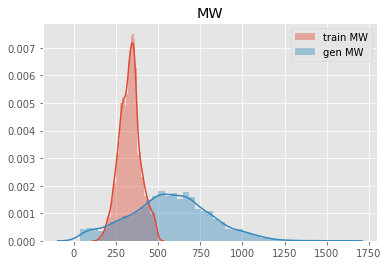

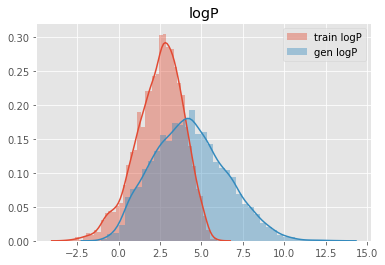

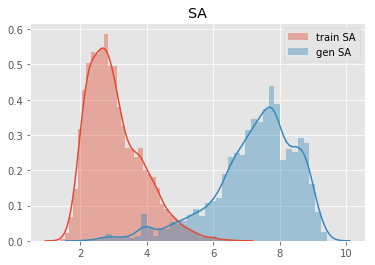

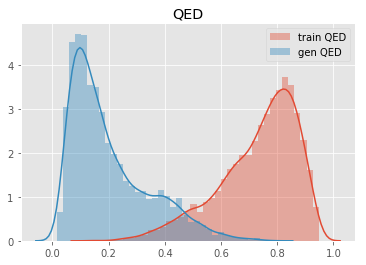

In [11]:
# histograms
plt.style.use('ggplot')
n_bins = 50

# MW
sns.distplot(mw_train_list, hist=True, kde=True, label='train MW')
sns.distplot(mw_gen_list, hist=True, kde=True, label='gen MW')
plt.legend(loc='upper right')
plt.title('MW')
plt.show()
# logP
sns.distplot(logp_train_list, hist=True, kde=True, label='train logP')
sns.distplot(logp_gen_list, hist=True, kde=True, label='gen logP')
plt.legend(loc='upper right')
plt.title('logP')
plt.show()
# SA
sns.distplot(sa_train_list, hist=True, kde=True, label='train SA')
sns.distplot(sa_gen_list, hist=True, kde=True, label='gen SA')
plt.legend(loc='upper right')
plt.title('SA')
plt.show()
# QED
sns.distplot(qed_train_list, hist=True, kde=True, label='train QED')
sns.distplot(qed_gen_list, hist=True, kde=True, label='gen QED')
plt.legend(loc='upper right')
plt.title('QED')
plt.show()

In [154]:
##  reward specific statistics

# ??

In [ ]:
# FCD score

#TODO(Bowen)